<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/13.SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

Support Vector Machine is a supervised machine learning algorithm to find the hyperplane (decision boundary) using support vectors.

## Terminology

- support vectors: the data points that lie closest
to the decision surface (or hyperplane)
- hyperplane: A hyperplane is the decision space. Here is a more formal definition:

   `A hyperplane in an n-dimensional Euclidean space is a flat, n-1 dimensional subset of that space that divides the space into two disconnected parts.`

- margin: the width that the boundary could be increased by before hitting a datapoint.



 The goal of SVM is to find the optimal hyperplane that has the maximum margin. (Source: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm)


 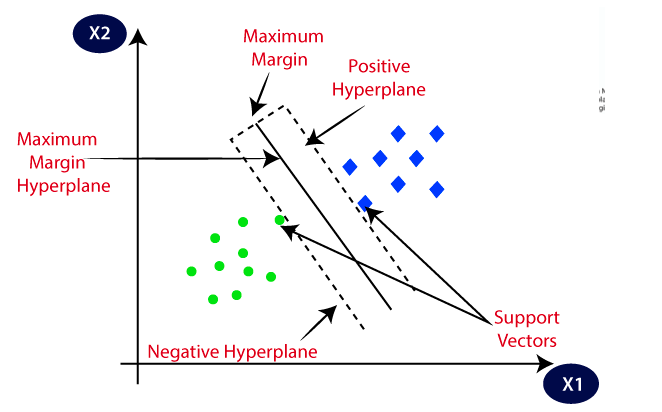

## Create input data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
      [6., 1.],
      [7., 3.],
      [8., 2.],    
      [9., 0.],
      [8., 4.],
      [8., 6.],
      [9., 2.],    
      [9., 5.]
    ])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

## play with the data

Put the expected values (y) in the same matrix X.

In [ ]:
y_reshape = np.reshape(y, (y.shape[0], -1))
data = np.append(X, y_reshape, axis=1)
data

array([[6., 1., 0.],
       [7., 3., 0.],
       [8., 2., 0.],
       [9., 0., 0.],
       [8., 4., 1.],
       [8., 6., 1.],
       [9., 2., 1.],
       [9., 5., 1.]])

Now it's easy to see and sort per expected values (ground truths).

In [ ]:
positives = X[y == 1]
positives

array([[8., 4.],
       [8., 6.],
       [9., 2.],
       [9., 5.]])

## Plot the data
Also do some initial plot fitting

### polyfit plotting

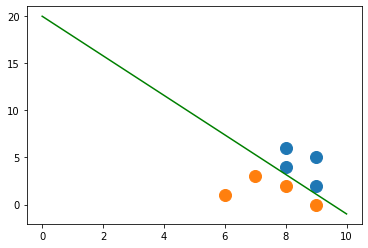

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='o', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')
  return ax

# plt.scatter(X[:, 0], X[:, 1])

ax = plot_data(X, y)
x_line = np.linspace(0, 10, 100)
y_line = -2.1*x_line + 20

ax.plot(x_line, y_line, 'g', label='y=wx+b')


## SVM using sklearn
Use SVM to predict on the data

In [ ]:
from sklearn import svm

svm_default = svm.SVC()
svm_default.fit(X, y)

preds = svm_default.predict(X)
num_err = np.sum(y != preds)
print("Number of errors: ", num_err)

Number of errors:  1


In [ ]:
from sklearn import svm

svr = svm.SVR()
svr.fit(X, y)

preds = svr.predict(X)
num_err = np.sum(y != np.round(preds, 0))
print("Number of errors: ", num_err)

Number of errors:  1


In [ ]:
svm_ovo = svm.SVC(decision_function_shape='ovo')
svm_ovo.fit(X, y)

preds = svm_ovo.predict(X)
preds

array([0, 0, 0, 0, 1, 1, 0, 1])

## Plot the classifier
The code is borrowed from [here](https://github.com/Bourbon0212/DataCamp-Practice/blob/master/Python/Linear%20Classifiers%20in%20Python/Linear%20Classifiers%20in%20Python.Rmd)

In [ ]:
# ```{r bound_plor, engine='python', echo = F}
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
    
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out
    
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

Now you can plot the trained SVM to see where the decision boundary is.

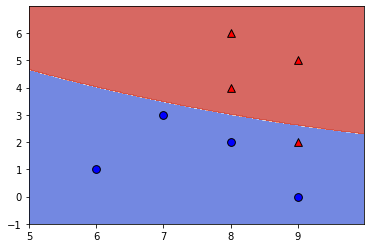

In [ ]:
plot_classifier(X, y, svm_default)